# Customer Churn Modeling

## Objective
Build and evaluate classification models to predict customer churn using the cleaned dataset.

This notebook covers all modeling tasks:

- ✅ Train/test split and feature scaling (as needed)
- ✅ Model training: Logistic Regression, Random Forest, Gradient Boosting
- ✅ Cross-validation and hyperparameter tuning
- ✅ Compare models using AUC-ROC and accuracy
- ✅ Interpret results and select the best model for deployment

**Goal**: Build a predictive model that accurately forecasts customer churn and provides actionable insights for retention.

# Setup

## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score




# Data Preparation

## Data Loading

In [2]:
df = pd.read_csv('datasets/churn_cleaned.csv')
df.head()

,monthlycharges,totalcharges,seniorcitizen,churn,tenure_months,type_One year,type_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,...,deviceprotection_No internet,deviceprotection_Yes,techsupport_No internet,techsupport_Yes,streamingtv_No internet,streamingtv_Yes,streamingmovies_No internet,streamingmovies_Yes,multiplelines_No phone service,multiplelines_Yes
0,29.85,29.85,0,1,0.0,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,56.95,1889.50,0,1,34.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,53.85,108.15,0,0,2.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,42.30,1840.75,0,1,45.0,True,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
4,70.70,151.65,0,0,2.0,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         7032 non-null   float64
 1   totalcharges                           7032 non-null   float64
 2   seniorcitizen                          7032 non-null   int64  
 3   churn                                  7032 non-null   int64  
 4   tenure_months                          7032 non-null   float64
 5   type_One year                          7032 non-null   bool   
 6   type_Two year                          7032 non-null   bool   
 7   paperlessbilling_Yes                   7032 non-null   bool   
 8   paymentmethod_Credit card (automatic)  7032 non-null   bool   
 9   paymentmethod_Electronic check         7032 non-null   bool   
 10  paymentmethod_Mailed check             7032 non-null   bool   
 11  gend

## Feature and Target Separation

In [4]:
X = df.drop('churn', axis=1)
y = df['churn']

## Train/Test Split

- Stratification ensures that the distribution of the target variable (churn) is approximately the same in both the training and test sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
# Check the stratification
# Check original class distribution
print("Full dataset:")
print(y.value_counts(normalize=True))

# Check train set
print("\nTrain set:")
print(y_train.value_counts(normalize=True))

# Check test set
print("\nTest set:")
print(y_test.value_counts(normalize=True))

Full dataset:
churn
1    0.734215
0    0.265785
Name: proportion, dtype: float64

Train set:
churn
1    0.734168
0    0.265832
Name: proportion, dtype: float64

Test set:
churn
1    0.734357
0    0.265643
Name: proportion, dtype: float64


## Scale Numeric Features

In [7]:
numeric_features = ['monthlycharges', 'totalcharges', 'tenure_months']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Modeling

## 4.1 Model Evaluation Function

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train) # Train the model (including best params, if it's from GridSearchCV)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluate the model on the test set
    roc_auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n📊 {model_name}")
    print("Accuracy:", round(acc, 4))
    print("ROC AUC :", round(roc_auc, 4))
    
    return {"model": model_name, "accuracy": acc, "roc_auc": roc_auc}


## Baseline Model: Logistic Regression

In [9]:
# Initialize and train model
model_results = []

lr = LogisticRegression(max_iter=1000, random_state=42)

model_results.append(evaluate_model(lr, X_train, X_test, y_train, y_test, "Logistic Regression"))


📊 Logistic Regression
Accuracy: 0.806
ROC AUC : 0.8487


## Compare with Other Models

- Decision Tree

- Random Forest

- Gradient Boosting (optional)



### DecisionTree Classifier

In [10]:
# Create the baseline DT model
dt = DecisionTreeClassifier(random_state=42)
model_results.append(evaluate_model(dt, X_train, X_test, y_train, y_test, "Decision Tree"))


📊 Decision Tree
Accuracy: 0.7981
ROC AUC : 0.734


In [11]:
# Tune the DT model
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit on training data
grid_dt.fit(X_train, y_train)

# Best model from grid
best_dt = grid_dt.best_estimator_

# Evaluate the best model
model_results.append(evaluate_model(best_dt, X_train, X_test, y_train, y_test, "Decision Tree (Tuned)"))



📊 Decision Tree (Tuned)
Accuracy: 0.8134
ROC AUC : 0.858


## RandomForest Classifier

In [12]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1  # shows progress
)

# Fit on training data
grid_rf.fit(X_train, y_train)

# Get the best model
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [13]:
model_results.append(evaluate_model(
    best_rf, X_train, X_test, y_train, y_test, "Random Forest (Tuned)"
))


📊 Random Forest (Tuned)
Accuracy: 0.8322
ROC AUC : 0.8732


In [14]:
print("Best hyperparameters:", grid_rf.best_params_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


### Feature Importance Interpretation (What the Model Thinks Matters Most)

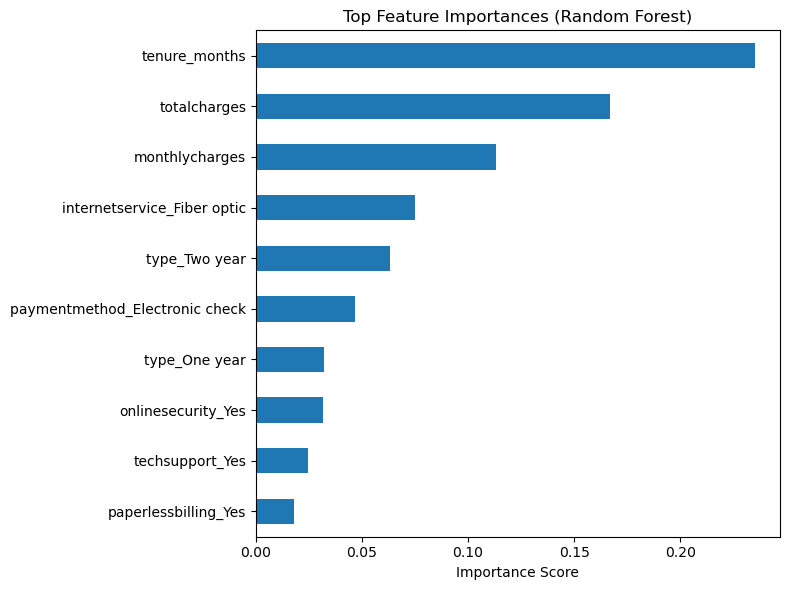

In [15]:
# Examine at the feature importance
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Sort and plot top features
top_n = 10  # show top 10
importances.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=(8, 6))
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

After training the Random Forest model, we looked at which features it relied on the most to make its predictions. Not surprisingly, **tenure** came out on top, the shorter someone has been with the company, the more likely they are to churn. This matches what we saw earlier in our EDA and statistical testing.

**Total charges** and **monthly charges** were also important, suggesting that how much a customer has paid (or is currently paying) affects their likelihood to leave.

Other standout features included contract type and internet service; customers on longer contracts and those not using fiber optic internet seemed less likely to churn, which also makes sense from a business perspective.

Looking at these results helps confirm that the model is picking up on patterns that align with what we already know — and gives us ideas for how to better support at-risk customers.

## XGBoost Classifier

In [16]:
# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best model
best_xgb = grid_xgb.best_estimator_

# Evaluate
model_results.append(evaluate_model(best_xgb, X_train, X_test, y_train, y_test, "XGBoost (Tuned)"))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:01] WARNING: /Users/runner/mi

/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:02] WARNING: /Users/runner/mi

/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/mi

/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1744352353999/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lrw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:07:03] WARNING: /Users/runner/mi


📊 XGBoost (Tuned)
Accuracy: 0.8567
ROC AUC : 0.8956


### Feature Importance for XGBoost

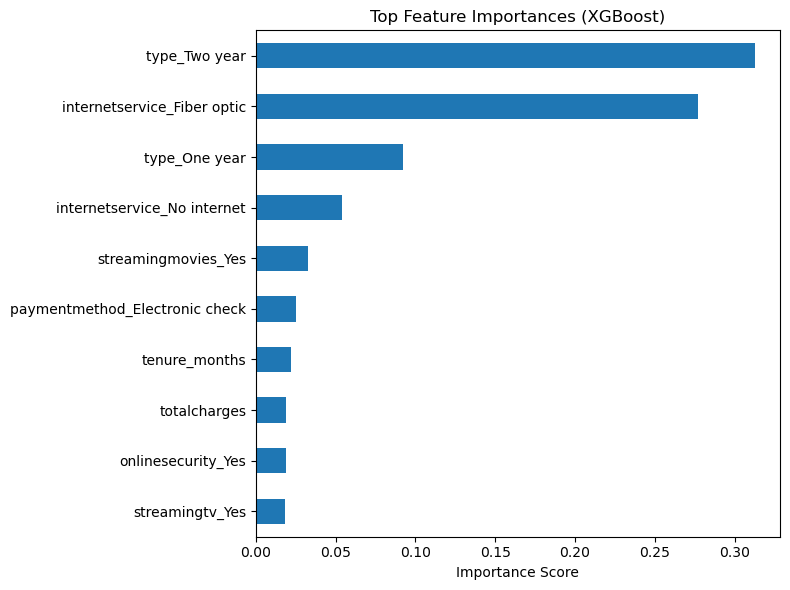

In [17]:
# Get feature importances from the trained model
xgb_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)

# Sort and plot
top_n = 10
xgb_importances.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=(8, 6))
plt.title("Top Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### What XGBoost Tells Us About Churn

After tuning XGBoost, we looked at which features the model relied on most when making predictions. The strongest signal came from **contract type**, especially whether a customer had a **two-year contract**. Customers with long-term contracts were much less likely to churn — which makes sense given the commitment involved.

Another top feature was whether the customer had **fiber optic internet**, which often comes with higher monthly charges — possibly linked to higher churn. XGBoost also picked up on whether customers had **no internet service at all**, which might reflect low usage or auto-cancellation situations.

Interestingly, **tenure** and **total charges**, which were the top features in Random Forest, were less important here. XGBoost focused more on **account structure** (contract and service choices) rather than usage behavior.

---

### Comparing XGBoost and Random Forest

Both models identified meaningful patterns, they just approached the problem from different angles. 

This gives us a more well-rounded understanding of what drives churn: both **how long someone has been with the company** and **what kind of plan or services they’re using**.

# Evaluation

In [18]:
# Create DataFrame from model_results list
results_df = pd.DataFrame(model_results)

# Set model name as index
results_df.set_index("model", inplace=True)

# Sort by accuracy
results_df = results_df.sort_values("roc_auc", ascending=False)

# Display
print("Model Comparison Summary (Sorted by ROC AUC):")
display(results_df.round(4))  # rounds metrics for cleaner display

Model Comparison Summary (Sorted by ROC AUC):


,accuracy,roc_auc
model,,
XGBoost (Tuned),0.8567,0.8956
Random Forest (Tuned),0.8322,0.8732
Decision Tree (Tuned),0.8134,0.8580
Logistic Regression,0.8060,0.8487
Decision Tree,0.7981,0.7340


We compared five models using both accuracy and ROC AUC, with a focus on identifying customer churn effectively:

**XGBoost** delivered the best results overall, with the highest ROC AUC (0.8956), showing it was the most effective at separating churners from non-churners. Random Forest and the tuned Decision Tree also performed well, with strong AUC scores and solid accuracy.

Even Logistic Regression performed competitively, confirming that some of the key patterns in churn are relatively linear and predictable.

The untuned Decision Tree was the weakest performer — reinforcing the importance of hyperparameter tuning and model selection when working with classification problems like churn.

# Final Recommendation

After testing and tuning several classification models, we recommend using the **tuned XGBoost model** to predict customer churn.

This model achieved the highest performance overall, with an **accuracy of 85.7%** and a **ROC AUC score of 0.896**, making it the most effective at distinguishing between customers who are likely to churn and those who are not.

XGBoost also offered interpretable insights into which features matter most — highlighting contract type, internet service, and tenure as key drivers of churn. These findings support earlier analysis and align with known business logic.

**Why XGBoost?**
- Strong predictive performance (highest AUC + accuracy)
- Tuned to balance model complexity and generalization
- Interpretable outputs (feature importance)
- Performs well with mixed data types and slight imbalance

This model would be a reliable foundation for a churn-risk dashboard, outreach automation, or targeted retention campaigns.